In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import display, Latex ##Used to print latex formatted text

%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

# Q1

In [2]:
colnames = ['variance','skewness','curtosis','entropy','class'] ##List of column names of dataset
dataset = pd.read_csv('banknote.txt',names = colnames) ##Reads the dataset into Datafra,e

dataset.head(100)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.446990,0
1,4.54590,8.1674,-2.45860,-1.462100,0
2,3.86600,-2.6383,1.92420,0.106450,0
3,3.45660,9.5228,-4.01120,-3.594400,0
4,0.32924,-4.4552,4.57180,-0.988800,0
...,...,...,...,...,...
95,-0.64472,-4.6062,8.34700,-2.709900,0
96,2.95430,1.0760,0.64577,0.893940,0
97,2.16160,-6.8804,8.15170,-0.081048,0
98,3.82000,10.9279,-4.01120,-5.028400,0


In [3]:
dataset['class'].replace(0,-1,inplace =True)##Converts Class labels from 0 to -1 as required for algorithm
dataset.head(25)
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,-0.110787
std,2.842763,5.869047,4.310030,2.101013,0.994207
min,-7.042100,-13.773100,-5.286100,-8.548200,-1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,-1.000000
50%,0.496180,2.319650,0.616630,-0.586650,-1.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
duplicate = dataset[dataset.duplicated()] ##Checks if Duplicate Rows present
print('Original Dataset Shape :',dataset.shape)
if(len(duplicate)!=0):
    dataset.drop_duplicates(inplace = True) ## If duplicate rows are found then they are dropped
    print('Dataset Shape after removing duplicates :',dataset.shape)

Original Dataset Shape : (1372, 5)
Dataset Shape after removing duplicates : (1348, 5)


In [5]:
##To Remove Outliers, we calculate z-score for each column and if z-score is greater than 3 or less than -3 we consider it outlier and remove it

dataset['zs_variance'] = (dataset['variance'] - np.mean(dataset['variance']))/ np.std(dataset['variance'])
dataset = dataset[np.abs(dataset['zs_variance'])<=3]
print(dataset.shape)

dataset['zs_skewness'] = (dataset['skewness'] - np.mean(dataset['skewness']))/ np.std(dataset['skewness'])
dataset = dataset[np.abs(dataset['zs_skewness'])<=3]
print(dataset.shape)

dataset['zs_entropy'] = (dataset['entropy'] - np.mean(dataset['entropy']))/ np.std(dataset['entropy'])
dataset = dataset[np.abs(dataset['zs_entropy'])<=3]
print(dataset.shape)

dataset['zs_curtosis'] = (dataset['curtosis'] - np.mean(dataset['curtosis']))/ np.std(dataset['curtosis'])
dataset = dataset[np.abs(dataset['zs_curtosis'])<=3]
print(dataset.shape)

dataset.drop(['zs_variance','zs_skewness','zs_entropy','zs_curtosis'],axis='columns',inplace=True)
dataset.shape

(1348, 6)
(1348, 7)
(1333, 8)
(1314, 9)


(1314, 5)

In [6]:
##Creates a held out Validation Set
validation = dataset.sample(frac=0.2389)
print('Validation Set Shape :',validation.shape)

Validation Set Shape : (314, 5)


In [7]:
##Forms Training Set by removing rows which are present in Validation Set

##We perform outer join on dataset and Validation Set and keep only those rows which only came from dataset
train = dataset.merge(validation, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']

train.drop('_merge',axis='columns',inplace = True) ## We drop the extra column '_merge' added during merge operation
print('Training Set Shape :',train.shape)
dataset.head(50)

Training Set Shape : (1000, 5)


,variance,skewness,curtosis,entropy,class
0,3.621600,8.66610,-2.80730,-0.446990,-1
1,4.545900,8.16740,-2.45860,-1.462100,-1
2,3.866000,-2.63830,1.92420,0.106450,-1
3,3.456600,9.52280,-4.01120,-3.594400,-1
4,0.329240,-4.45520,4.57180,-0.988800,-1
5,4.368400,9.67180,-3.96060,-3.162500,-1
6,3.591200,3.01290,0.72888,0.564210,-1
7,2.092200,-6.81000,8.46360,-0.602160,-1
8,3.203200,5.75880,-0.75345,-0.612510,-1
9,1.535600,9.17720,-2.27180,-0.735350,-1


### Threshold parameter in below function is used to check covergence of weight vector. Suppose threshold value is 50 then if model has not made prediction mistake in last 51 consecutive iterations we consider that weights have converged.

In [8]:
##Perceptron Algorithm as per Lecture Slides

def percepalgo(X,Y,learn_rate,threshold):
    w = np.array([1,1,1,1]) ##Initialize Weight Vector
    nt = learn_rate ##Set Learning Rate
    count = 0 ##Used to keep Track for how many iterations our model has not made any prediction mistake
    k = threshold
    while(True):
        
        randint = np.random.randint(0,len(Y)) ##Generates a random integer to be used select a random (xn,yn) pair
        xn = np.array(X.iloc[randint])
        yn = Y.iloc[randint]
    
        if(yn * np.sum(w*xn) < 0): ##Checks whether model has made a prediction mistake. if yes, then model weights are updated
                                   ##and count is reset to 0. If No, then count is increased by 1
        
            w = w + nt*yn*xn
            count = 0
            
        else:
            count+=1
        
        if(count >k): ##Checks whether model has not made any mistakes in last k+1 (threshold value passed) iterations, if yes then weights
                      ##have converged and we stop the loop.
            break
      
       
    return w ##Returns the converged weight vector
        

In [9]:
##Function to make Predictions

def predictions(X,w): ##Takes parameters as input vector X and converged weight vector w
    
    y_pred = np.round(np.sum(X*w,axis = 1)) ##Performs row wise element wise product of weight vector and input vector and
                                            ##takes it sum and rounds to nearest integer.
    
    y_pred[y_pred >= 0]  = 1 ##If predicted y value is gretaer than or equal to 0 we store class label as 1
    y_pred[y_pred < 0]  = -1 ##If predicted y value is less than 0 we store class label as -1
   
    
    return y_pred ##Returns array of predicted class labels

In [10]:
##Function To calculate Error made by model. We have taken error function has percentage of misclassifications by model.

def error(yn,y_pred):
    count = 0
    for i in range(len(yn)):
        if(yn[i]!=y_pred[i]): ##Counts no of mistakes
            count+=1
    return((count/len(yn))*100) ##Returns percentage of mistake 

### We assume Learning Rate and Threshold as Hyperparameters and perform Cross Validation to fnd Weight Vector which gives minimum Average Error 

In [11]:
## We perform 10-Fold Cross validation to determine value of Hyperparameter Learning Rate

f = ['variance','skewness','curtosis','entropy'] 


hyperparams = [] ##List to store hyperparameter values and corresponding weight vector and error percent

for k in range(10,101,10): ##Loops over different threshold values from 10 to 100 in steps of 10
    for j in range(1,21): ##Loops over different values of Learing rate from 0.05 to 1 in steps of 0.05
   
        e = 0 ##Initialize error for particular current learning rate to 0
    
        w1 = np.array([0.0,0.0,0.0,0.0]) ##Array to store sum of weights for each fold in cross validation
    
        for i in range(0,10): ##loops over cross validation sets
       
            test = train[i*100:(i+1)*100] ##Splitted the training data into 9:1 ratio for train:test set
            train_cross = pd.concat([train[0:i*100],train[(i+1)*100:]])
            
            w = percepalgo(train_cross[f],train_cross['class'],0.05*j,k) ##Finds Converged weight vector over a training set and learning rate
        
            y_pred = predictions(np.array(test[f]),w) ##Calculates the predicted class labels for the test set using converged weigth vector from above
        
            e += error(np.array(test['class']),np.array(y_pred)) ##Calculates model error and adds it to overall error for a learning rate
        
            w1 += w ##Adds the current weight vector to overall weight vector for a learning rate
    
        hyperparams.append([k,0.05*j, w1/10 , e/10]) ##There is entry for each Threshold and Learning rate 


Error for Threshold  10  :  [14.6 13.8 16.2 11.9 17.1 16.7 15.7 19.1 11.1 12.8 15.1 11.8 14.  17.7
 12.7 10.2 17.6 16.5 12.  18.5]
Error for Threshold  20  :  [ 5.7  7.1  6.9  6.2  8.5  7.4  9.8  7.9  8.1  7.5  9.1  9.4  6.8  8.7
  9.   9.5  9.   7.6 11.4  8.9]
Error for Threshold  30  :  [4.8 5.8 7.5 6.6 5.6 6.9 8.3 6.9 8.2 8.  6.9 7.2 8.7 7.6 6.4 7.8 7.6 7.7
 6.6 8.7]
Error for Threshold  40  :  [4.5 4.2 5.4 4.9 6.8 6.2 5.8 5.4 5.8 6.2 6.5 7.9 6.2 6.5 6.8 9.1 6.4 6.7
 7.8 9.5]
Error for Threshold  50  :  [5.3 5.6 6.6 5.1 5.9 7.5 5.2 6.1 5.6 7.1 7.2 6.1 5.7 6.8 5.5 5.2 5.8 5.6
 7.5 6.6]
Error for Threshold  60  :  [3.3 5.  6.4 5.7 7.5 5.7 6.5 6.2 6.3 5.8 6.7 7.4 5.8 6.7 5.4 7.2 7.5 5.5
 6.6 6.2]
Error for Threshold  70  :  [4.2 5.5 5.3 5.7 6.3 6.2 5.9 6.6 6.2 5.6 7.1 5.7 6.2 6.5 5.7 6.2 5.9 5.8
 5.7 5.8]
Error for Threshold  80  :  [3.7 4.6 6.2 5.8 5.8 5.6 5.9 6.2 6.4 6.  5.1 5.2 6.5 6.  6.1 7.7 5.8 7.
 5.9 6.7]
Error for Threshold  90  :  [3.6 5.1 5.9 6.2 5.1 4.9 6.4 4.9 5.5 5.2 6.3 

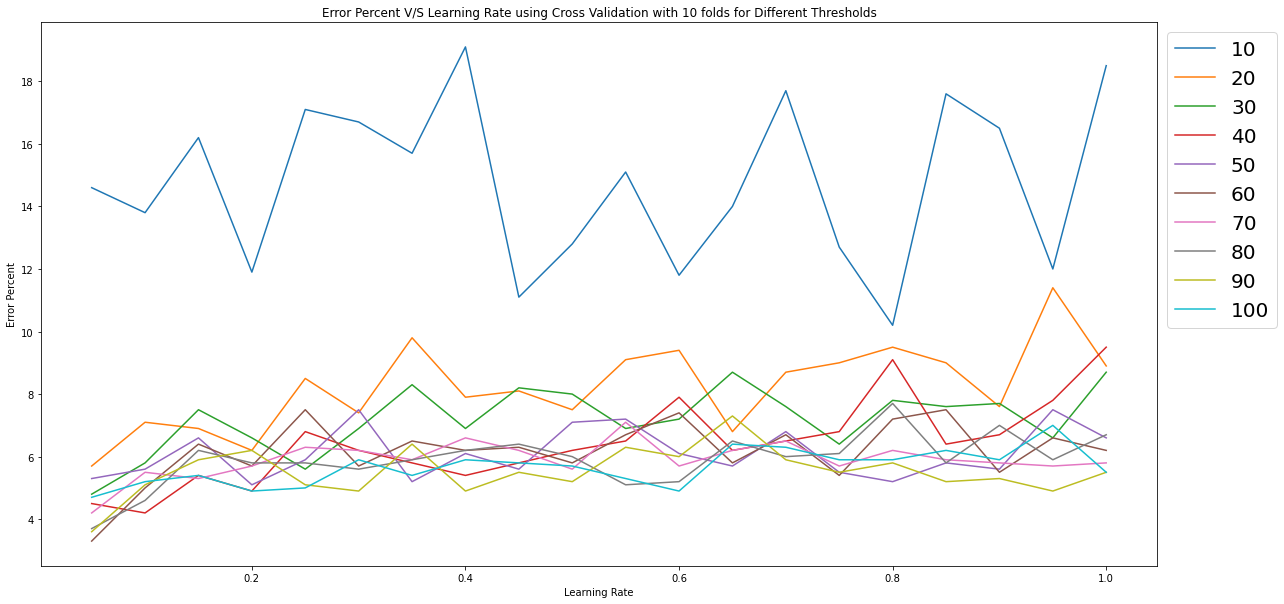

In [12]:
fig , ax = plt.subplots(1)


for k in range(10,101,10):
    
    values=np.array([h[3] for h in hyperparams if h[0] == k])
    print('Error for Threshold ',k,' : ',values)
    keys=np.array([h[1] for h in hyperparams if h[0] == k])
    ax.plot(keys, values,label=k)
    
    
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Error Percent')
ax.legend(bbox_to_anchor = (1, 1),prop= {'size' : 20})
ax.set_title('Error Percent V/S Learning Rate using Cross Validation with 10 folds for Different Thresholds')
print()

Error for Lerning Rate  0.05  :  [14.6  5.7  4.8  4.5  5.3  3.3  4.2  3.7  3.6  4.7]
Error for Lerning Rate  0.1  :  [13.8  7.1  5.8  4.2  5.6  5.   5.5  4.6  5.1  5.2]
Error for Lerning Rate  0.15  :  [16.2  6.9  7.5  5.4  6.6  6.4  5.3  6.2  5.9  5.4]
Error for Lerning Rate  0.2  :  [11.9  6.2  6.6  4.9  5.1  5.7  5.7  5.8  6.2  4.9]
Error for Lerning Rate  0.25  :  [17.1  8.5  5.6  6.8  5.9  7.5  6.3  5.8  5.1  5. ]
Error for Lerning Rate  0.3  :  [16.7  7.4  6.9  6.2  7.5  5.7  6.2  5.6  4.9  5.9]
Error for Lerning Rate  0.35  :  [15.7  9.8  8.3  5.8  5.2  6.5  5.9  5.9  6.4  5.4]
Error for Lerning Rate  0.4  :  [19.1  7.9  6.9  5.4  6.1  6.2  6.6  6.2  4.9  5.9]
Error for Lerning Rate  0.45  :  [11.1  8.1  8.2  5.8  5.6  6.3  6.2  6.4  5.5  5.8]
Error for Lerning Rate  0.5  :  [12.8  7.5  8.   6.2  7.1  5.8  5.6  6.   5.2  5.7]
Error for Lerning Rate  0.55  :  [15.1  9.1  6.9  6.5  7.2  6.7  7.1  5.1  6.3  5.3]
Error for Lerning Rate  0.6  :  [11.8  9.4  7.2  7.9  6.1  7.4  5.7  5

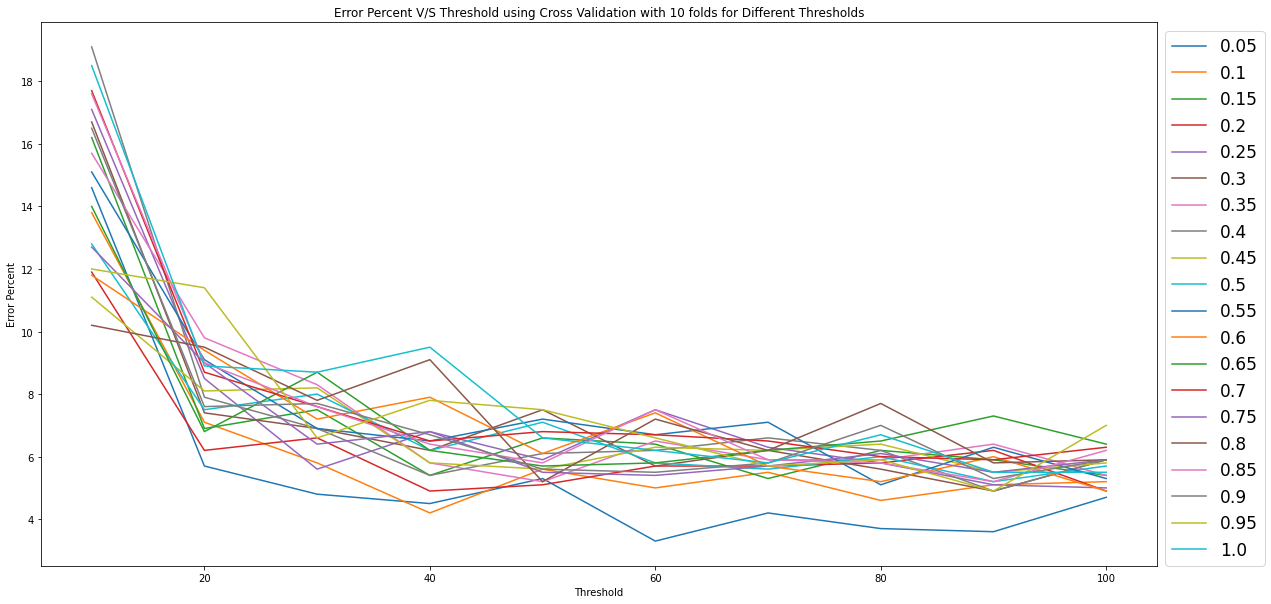

In [13]:
fig , ax = plt.subplots(1)


for k in range(1,21):
    
    values=np.array([h[3] for h in hyperparams if h[1] == 0.05*k])
    print('Error for Lerning Rate ',np.round(0.05*k,2),' : ',values)
    keys=np.array([h[0] for h in hyperparams if h[1] == 0.05*k])
    ax.plot(keys, values,label=np.round(0.05*k,2))
    
    
ax.set_xlabel('Threshold')
ax.set_ylabel('Error Percent')
ax.legend(bbox_to_anchor = (1, 1),prop= {'size' : 17})
ax.set_title('Error Percent V/S Threshold using Cross Validation with 10 folds for Different Thresholds')
print()

In [14]:
error_min = 100 ## We initialize minimum error to 100%
best_weight = np.array([]) ##Empty array to store Best Model weights
best_learnrate = 0 ##Stores the learning rate for which Average weight is minimum

for h in hyperparams:
    if(h[3] < error_min):
        
        error_min = h[3]
        best_weight = h[2]
        best_learnrate = h[1]
        best_threshold = h[0]


##Outputs the Best Model Parameters and corresponding learning rate and Threshold Value
print('Best Model weights : ',best_weight,'with average error of',error_min,'%')
print('Best Learning Rate is',best_learnrate,'and Best Threshold value is',best_threshold)

Best Model weights :  [-1.28497113 -0.79819681 -0.70243093 -0.51255403] with average error of 3.3 %
Best Learning Rate is 0.05 and Best Threshold value is 60


In [15]:
##Function to calculate F-Score for a target class

def fscorecalc(t,y_pred,yn):
    tp = fp = fn = tn = 0 ##Initialixe True Positive (tp) , True Negative (tn) , False Positive (fp) and False Negative (fn) to 0
    
    for i in range(len(y_pred)): ##For each prediction checks if predicted value and given value is same, if same then
                                 ##checks if predicted value is equal to target, if yes then True Positive else True Negative
                                 ##If predicted value and actual value are not same, then check if predicted value same as target 
                                 ##then False Positive else False Negative
        if(y_pred[i] == yn[i] ):
            if(y_pred[i] == t):
                tp+=1
            else:
                tn+=1
        else:
            if(y_pred[i]== t):
                fp+=1
            else:
                fn+=1
    
    print('True Positive :',tp,'\nFalse Positive :',fp,'\nTrue Negative :',tn,'\nFalse Negative :',fn)
    prec = tp / (tp + fp)    ##Precision is calculated as True Positive over sum of True Positive and False Positive
    
    recall = tp / (tp + fn)   ##Recall is claculated as True Positive over sum of True Positive and False Negative
    
    return (2*prec*recall) / (prec + recall) ##Returns F score which is calculated as harmonic mean of precision and recall
                

In [16]:
y_pred = predictions(np.array(validation[f]),best_weight) ##Calculates predictions for Validation Set data

print('\nError of Best Model on Validation Set is ',error(np.array(validation['class']),np.array(y_pred)),'%\n') ##Model Error

print('F Score for class 1 is',fscorecalc(1,y_pred,np.array(validation['class'])),'\n') ##F-Score for Class label '1'

print('F Score for class -1 is',fscorecalc(-1,y_pred,np.array(validation['class']))) ##F-Score for class label '-1'


Error of Best Model on Validation Set is  1.2738853503184715 %

True Positive : 140 
False Positive : 1 
True Negative : 170 
False Negative : 3
F Score for class 1 is 0.9859154929577465 

True Positive : 170 
False Positive : 3 
True Negative : 140 
False Negative : 1
F Score for class -1 is 0.9883720930232557


# Q2

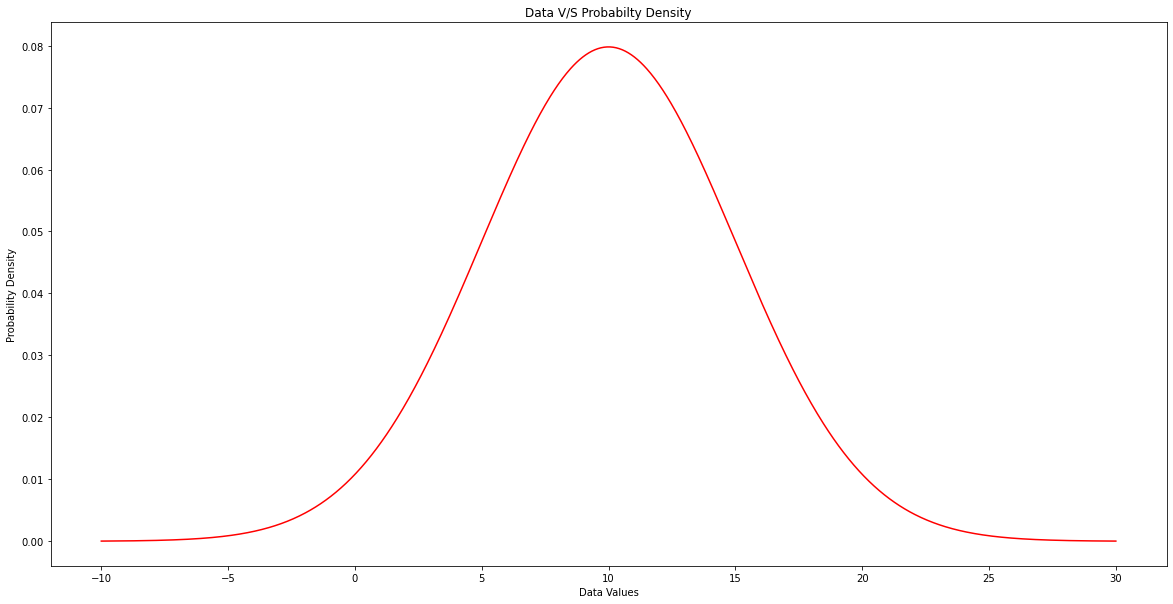

In [17]:
fig , ax = plt.subplots(1)
data = np.random.normal(10,5,50) ##GEnerates 50 samples of Data from a Normal Distribution with Mean 10 and S.D 5

r_data = np.linspace(10-4*5,10+4*5,1000)##Gives 1000 equally spaced points from 10-4*5 to 10+4*5

##Plots the datapoint and its probability density 
ax.plot(r_data, 1/(5 * np.sqrt(2 * np.pi)) *np.exp( - (r_data - 10)**2 / (2 * 5**2) ), color='r')
ax.set_xlabel('Data Values')
ax.set_ylabel('Probability Density')
ax.set_title('Data V/S Probabilty Density')
print()

````{div} full-width
````
## Derivation of Maximum Likelihood Estimate(MLE) for a Normal Distribution <br><br>

$\large{\text{ Probability Density Function (PDF) of Normal Distribution :  }}$ <br><br>

$$\large{f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}}$$ <br><br>

$\large{\text{ Suppose we have } n \text{ independently and identically distributed observations as } x_{1},x_{2},\dots,x_{n}}$ $\large{\text{ from a Normal Distribution } \mathcal{N}(\mu,\,\sigma^{2}) }$ <br><br>

$\large{\text{ As they are independent, Likelihood  given } \mu \text{ and } \sigma \text{ is }}$ <br><br>


$$\large{\begin{align}
L(x_{1},x_{2},\dots,x_{n}|\sigma,\mu)&=\prod_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \bigl({x_{i} - \mu } \bigr)^{2} \mathbf{\Bigg\}}\\ \\
&=\Biggl(\frac{1}{\sigma\sqrt{2\pi}}\Biggr)^{n} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\bigl({x_i - \mu} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \sum_{i=1}^{n}\bigl({x_i ^ 2  + \mu ^ 2 - 2 x_i \mu } \bigr)\mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \left(\sum_{i=1}^{n}x_i ^ 2  + n \mu ^ 2 - 2 n \bar{x} \mu  \right)\mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{n}{2\sigma^{2}} \left(\mu ^ 2 - 2 \bar{x} \mu + \frac{1}{n} \sum_{i=1}^{n}x_i ^ 2 \right)\mathbf{\Bigg\}} \ldots\ldots (1) \\\\
\end{align}}$$
<br><br>

$\large {\text{ As we know Likelihood is also Normal, equation in form of } \mu_{MLE} \text{ and } \sigma_{MLE} \text{ is }}$
<br><br>

$$\large{\begin{align}
&=\Biggl(\frac{1}{\sigma_{MLE}\sqrt{2\pi}}\Biggr) \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu - \mu_{MLE}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu - \mu_{MLE}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&= \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MLE}^{2}} \bigl({\mu ^ 2  + \mu_{MLE} ^ 2 - 2 \mu \mu_{MLE} } \bigr)\mathbf{\Bigg\}}\ldots\ldots (2) \\\\
\end{align}}$$
<br><br>

$\large{\text{Comparing (1) and (2) , we get  } \mu_{MLE} \text{ and } \sigma_{MLE} \text{ as } }$
<br><br>

$$\large{\mu_{MLE} = \bar{x}}$$<br><br>
$$\large{\sigma_{MLE}^2 = \frac{\sigma^2}{n}}$$ <br><br>
$$\large{\sigma_{MLE} = \frac{\sigma}{\sqrt{n}}}$$ <br><br>




### $$L \sim \mathcal{N}(\mu_{MLE},\,\sigma_{MLE}^{2}) $$



In [18]:
###Function to Calculate Probability Density given a point x, Mean and Standard Deviation

def normcalc(x,mu,std):
    
    return(1/(std * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * std**2)))

In [19]:
mu_likelihood = np.mean(data) ##Calculates MLE Mean using formula derived above
std_likelihood = np.sqrt(25/50) ## Calculates MLE Standard Deviation using formula derived above

mu_space1 = np.linspace(mu_likelihood - 4* std_likelihood,mu_likelihood + 4* std_likelihood,1000) ##Gives 1000 equally spaced points from mu_likelihood - 4* std_likelihood to mu_likelihood + 4* std_likelihood
likelihood=[] ##List to store Probability density of mu with respect to likelihood
for i in mu_space1:
    likelihood.append(normcalc(i,mu_likelihood,std_likelihood))##Calculates Probability Density of mu using MLE

mu_space2 = np.linspace(25-4*5,25+4*5,1000) ##Gives 1000 equally spaced points from 25 - 4*5 to 25 + 4*5
prior =[] ##List to store Probability density of mu with respect to prior 
for i in mu_space2:
    prior.append(normcalc(i,25,5)) ##Calculates Probability Density of mu using prior parameters
 


````{div} full-width
````
## Derivation of Maximum a Posteriori (MAP) Estimate for a Normal Distribution<br><br>

$\large{Prior \sim \mathcal{N}(\mu_{0},\,\sigma_{0}^{2}) }$ <br><br>
$\large{\text{ Suppose we have } n \text{ independently and identically distributed observations as } x_{1},x_{2},\dots,x_{n}}$ $\large{\text{ from a Normal Distribution } \mathcal{N}(\mu,\,\sigma^{2}) }$ <br><br>

$\large{\text {Then Posterior (} \mathbf{P}) \text{ is } }$<br><br>


$$\large{\begin{align}
\mathbf{P} &\propto \mathbf{L} * \mathbf{Prior} \\\\
&= \frac{1}{\sqrt{2\pi\sigma_{0}^2}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{0}^{2}} \bigl({\mu - \mu_{0} } \bigr)^{2} \mathbf{\Bigg\}} * \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma^2}} \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma^{2}} \bigl({x_{i} - \mu } \bigr)^{2} \mathbf{\Bigg\}} \\\\
&= \frac{1}{{(2\pi)}^{\frac{(n+1)}{2}} \sqrt{\sigma_{0}^2 \sigma^{2n}}} \quad \mathbf{exp \Bigg\{} \frac{-\mu^2 + 2\mu\mu_{0} - \mu_{0}^2}{2\sigma_{0}^{2}} - \sum_{i=1}^{n} \frac {x_{i} ^2 - 2\mu x_{i} + \mu^2}{2\sigma^2}\mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{}  \frac{-\mu^2(\sigma^2 + n \sigma_{0}^2) + 2\mu (\mu_{0} \sigma^2 + \sigma_{0}^2 x_{1} + \dots + \sigma_{0}^2 x_{n})- (\mu_{0}^2 \sigma^2 + \sigma_{0}^2 x_{1}^2 + \dots + \sigma_{0}^2 x_{n}^2 )}{2\sigma_{0}^2 \sigma^2}   \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} \frac{-\mu^2 + 2\mu \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} - \left(  \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} \right)^2}{2 \frac{\sigma_{0}^2 \sigma^2}{\sigma^2 + n\sigma_{0}^2}}  \mathbf{\Bigg\}} * \mathbf{exp \Bigg\{}  - \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}^2}{2\sigma_{0}^2 \sigma^2}  \mathbf{\Bigg\}}\\\\
&\propto \mathbf{exp \Bigg\{}  - \frac{\left( \mu -  \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_{i}}{\sigma^2 + n\sigma_{0}^2} \right)^2}{2 \frac{\sigma_{0}^2 \sigma^2}{\sigma^2 + n\sigma_{0}^2}}   \mathbf{\Bigg\}} \ldots \dots (1) \\\\
\end{align}}$$
<br><br>

$\large {\text{ As we know Posterior is also Normal, equation in form of } \mu_{MAP} \text{ and } \sigma_{MAP} \text{ is }}$
<br><br>

$$\large{\begin{align}
&=\Biggl(\frac{1}{\sigma_{MAP}\sqrt{2\pi}}\Biggr) \quad \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MAP}^{2}} \bigl({\mu - \mu_{MAP}} \bigr)^2 \mathbf{\Bigg\}} \\\\
&\propto \mathbf{exp \Bigg\{} -\frac{1}{2\sigma_{MAP}^{2}} \bigl({\mu - \mu_{MAP}} \bigr)^2 \mathbf{\Bigg\}} \ldots\ldots (2)  \\\\
\end{align}}$$
<br><br>


$\large{\text{Comparing (1) and (2) , we get  } \mu_{MAP} \text{ and } \sigma_{MAP} \text{ as } }$
<br><br>



$$\large{\begin{align}
\sigma_{MAP}^2 &= \frac{\sigma^2 \sigma_{0}^2}{\sigma^2 + n\sigma_{0}^2} \\\\
&= \frac {1}{\sigma_{0}^{-2} + n\sigma^{-2}}  \\\\
&= \biggl(\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}\biggr)^{-1}
\end{align}}$$
<br><br>

$$\large{\sigma_{MAP} = \sqrt{\biggl(\frac{1}{\sigma_{0}^2} + \frac{n}{\sigma^2}\biggr)^{-1}}} $$<br><br>

$$\large{\begin{align}
\mu_{MAP} &= \frac{\mu_{0} \sigma^2 + \sum_{i=1}^{n} \sigma_{0}^2 x_i}{\sigma^2 + n\sigma_{0}^2} \\\\
&= \frac{\mu \sigma_{0}^{-2} + \sum_{i=1}^{n}  x_i \sigma^{-2}}{\sigma_{0}^{-2} + n\sigma^{-2}} \\\\
&= \sigma_{MAP}^2 \left(  \mu_{0} \sigma_{0}^{-2} + \sum_{i=1}^{n} x_i \sigma^{-2}  \right) \\\\
&= \sigma_{MAP}^2 \left(\frac{\mu_{0}}{\sigma_{0}^2} +  \frac{n\bar{x}}{\sigma^2}\right) \\\\
\end{align}}$$
<br><br>




### $$\mathbf{P} \sim \mathcal{N}(\mu_{MAP},\,\sigma_{MAP}^{2}) $$


In [20]:
def posteriorgen(mu_prior, std_prior , no_of_obs , std_data , mean_data ):
    std_posterior = np.sqrt(1 / ((1/(std_prior**2)) + (1/((std_data**2)/no_of_obs)))) ##Calculates MAP Standard Deviation using  formula derived above
    mu_posterior = (std_posterior**2)*((mu_prior/(std_prior**2)) + (mean_data*no_of_obs/(std_data**2))) ##Calculates MAP Mean using formula derived above
    mu_space3 = np.linspace(mu_posterior - 4* std_posterior,mu_posterior + 4* std_posterior,1000) ##Gives 1000 equally spaced points from mu_posterior - 4* std_posterior to mu_posterior + 4* std_posterior
    posterior = [] ##List to store Probability density of Mean with respect to Posterior parameters
    for i in mu_space3:
        posterior.append(normcalc(i,mu_posterior,std_posterior)) ##Probability density of Mean with respect to Posterior parameters

    return (mu_space3 , posterior,mu_posterior,std_posterior)

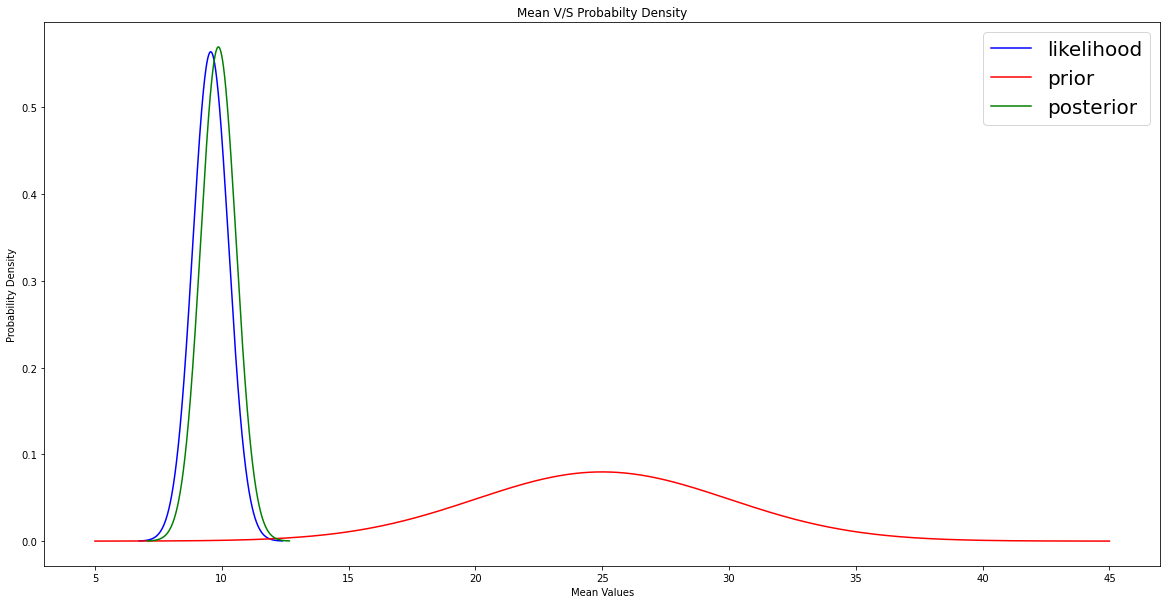

In [21]:
fig , ax = plt.subplots(1)

mu_space3,posterior , mu_posterior , std_posterior = posteriorgen(25,5,50,5,mu_likelihood)##Function call to generate posterior with parameters mean and standard deviation of prior , mean of observed data , standard deviation of data and no of observations

##Plots PDF of Likelihood , Prior and Posterior
ax.plot(mu_space1,likelihood, color = 'b',label= 'likelihood')
ax.plot(mu_space2,prior , color = 'r', label = 'prior')
ax.plot(mu_space3,posterior, color = 'g' , label = 'posterior')
ax.legend(loc = 'upper right' , prop = {'size' : 20})
ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

In [22]:

###Function to Perform MCMC Sampling using Metropolis-Hastings Algorithm. takes parameter as initial random mean ,S.D and threshold value k

def mcmc(mu,sigma,k):
    
    current_mu = mu ##Initializes Current_mu to passed initial mean value
    proposed_posterior = [current_mu] ##Adds passed mean as first accepted poiint of posterior
    count = 0 ##Used to keep track of no of consecuitve iterations where mean has  changed by less than 0.0001
    old_mean = 0 ##used to keep track of previous mean of posterior

    while(True):
        proposed_mu = np.random.normal(current_mu,sigma)##Generates a new proposal mean from a normal distribution dependent only on current mean and S.D passed earlier
        
        curr_prob = normcalc(current_mu,mu_likelihood,std_likelihood) * normcalc(current_mu,25,5) ##Computes Probability of Current Mean Representing our Data
        proposed_prob = normcalc(proposed_mu,mu_likelihood,std_likelihood) * normcalc(proposed_mu,25,5)##Computes Probability of Proposed Mean Representing our Data
        
        r = proposed_prob/curr_prob ## Computes ratio 
        
        if r > np.random.uniform(0,1):  ##If ratio computed is gretaer than a random float value between 0 and 1 then proposed mean is accepted and its value is given to current mean
            current_mu = proposed_mu
        proposed_posterior.append(current_mu)
        
        if(np.abs(old_mean - np.mean(proposed_posterior)) < 0.0001): ##Checks whether Mean of Posterior has changed by less than 0.0001
            count+=1   ##if yes then count is increemented by 1
        else:
            count = 0  ##Else count is set to 0
        
        old_mean = np.mean(proposed_posterior) ##Old mean is set to mean of updated posterior value list
        
        if(count>k): ##If count is greater than threshold K passed then loop terminates signifying Convergence of Histogram
            break
    
    return proposed_posterior ##Returns Posterior List

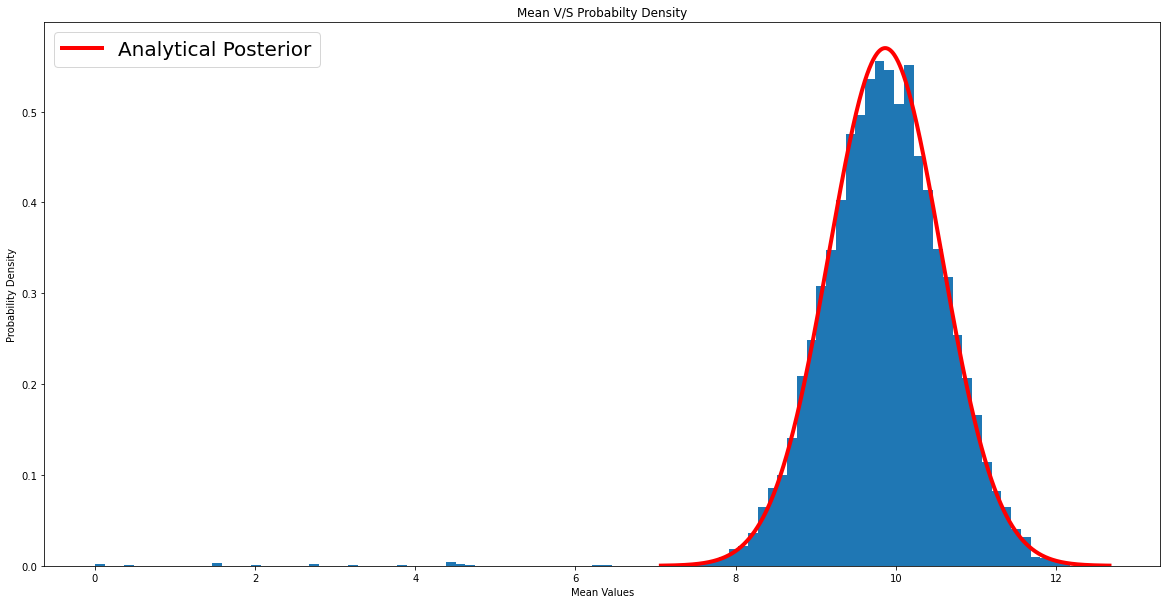

In [23]:
fig , ax = plt.subplots(1)

proposal_posterior = mcmc(0,1,1000) ##Approximates the posterior using mean = 0 , S.D = 1 and threshold (k) = 100 as parameters

ax.hist(proposal_posterior,bins=100,density = True) ##Plots the Posterior points and thier density as a Histogram

ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4)##Plots the Analytical Posterior or Posterior calculaed previously using MAP estimates
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

Sorted Convergence Time : 
Convergence Time for Width 15.0 is 0.16162610054016113
Convergence Time for Width 13.0 is 0.2522552013397217
Convergence Time for Width 9.5 is 0.3248753547668457
Convergence Time for Width 11.5 is 0.44119715690612793
Convergence Time for Width 12.0 is 0.758244514465332
Convergence Time for Width 14.5 is 0.9710333347320557
Convergence Time for Width 14.0 is 1.261925220489502
Convergence Time for Width 8.0 is 1.2847871780395508
Convergence Time for Width 9.0 is 1.329430341720581
Convergence Time for Width 6.5 is 1.4136183261871338
Convergence Time for Width 11.0 is 1.5955467224121094
Convergence Time for Width 10.5 is 1.6475121974945068
Convergence Time for Width 13.5 is 1.7353661060333252
Convergence Time for Width 12.5 is 1.827573299407959
Convergence Time for Width 7.5 is 1.9155550003051758
Convergence Time for Width 7.0 is 1.9312503337860107
Convergence Time for Width 8.5 is 2.8393778800964355
Convergence Time for Width 10.0 is 3.260749340057373
Convergence

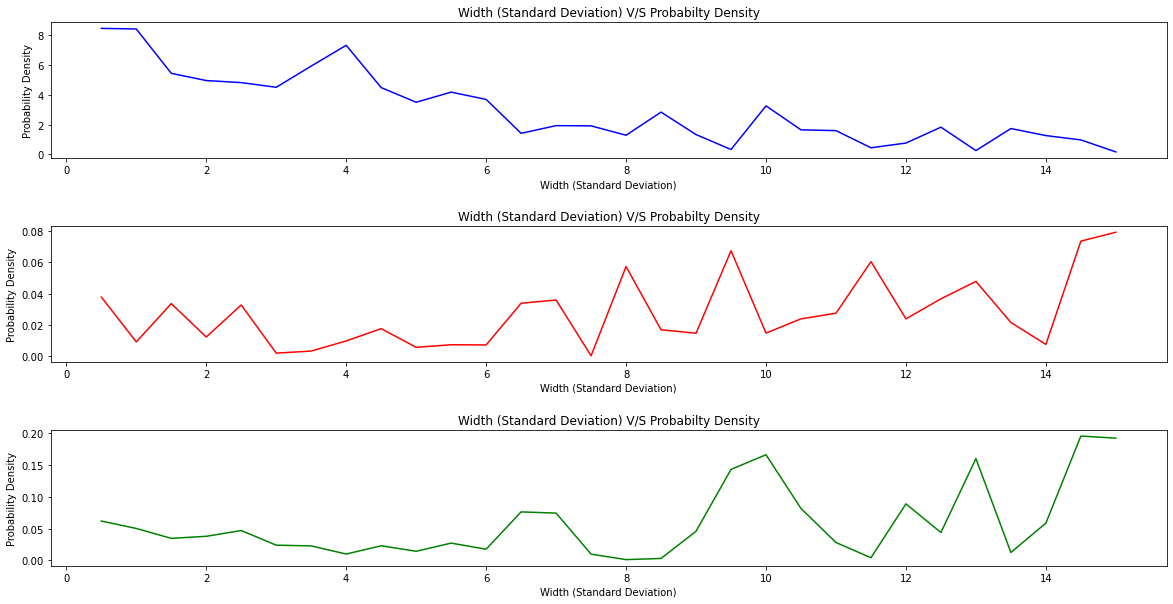

In [24]:
## Finds whether a Optimal Width exists wih respect to Convergence Time , Mean Difference and Standard Deviation Difference

fig , ax = plt.subplots(3)
mean_diff = {} ##Dictionary to store Proposal Width and its Mean Difference
convergetime = {} ##Dictionary to store Proposal Width and its Convergence Time
std_diff ={}##Dictionary to store Proposal Width and its Standard Devuation Difference

for i in range(1,31): ##Checks Proposal Width from 0.5 to 15 
    st = time.time() ##Stores the time at start
    proposal_posterior = mcmc(0,i*0.5,100) ##Approximates Posterior with Mean = 0 and Width = 0.5 * i and threshold = 100
    convergetime[0.5*i] = time.time() - st ##Stores Convergence Time taken
    mean_diff[0.5*i] = np.abs(np.mean(proposal_posterior) - mu_posterior) ##Calculates Difference between Mean of Analytical Posterior and Proposed Posterior
    std_diff[0.5*i] = np.abs(np.std(proposal_posterior) - std_posterior) ##Calculates Difference between Standard Deviation of Analytical Posterior and Proposed Posterior

##Plots Proposal Width and its Convergence Time
ax[0].plot(convergetime.keys(),convergetime.values(),label = 'Convergence Time' ,color = 'b')
ax[0].set_xlabel('Width (Standard Deviation)')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Plots Proposal Width and its Mean Difference
ax[1].plot(mean_diff.keys(),mean_diff.values(),label = 'Mean Difference' , color = 'r')
ax[1].set_xlabel('Width (Standard Deviation)')
ax[1].set_ylabel('Probability Density')
ax[1].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Plots Proposal Width and its Standard Deviation Difference
ax[2].plot(std_diff.keys(),std_diff.values(),label = 'Standard Deviation Difference',color = 'g')
ax[2].set_xlabel('Width (Standard Deviation)')
ax[2].set_ylabel('Probability Density')
ax[2].set_title('Width (Standard Deviation) V/S Probabilty Density')

##Sorts the dictionary based on values and prints it
convergetime = {i[0] : i[1] for i in sorted(convergetime.items(), key=lambda x: x[1])}
print('Sorted Convergence Time : ')
for i , value in convergetime.items():
    print('Convergence Time for Width',i,'is',value)

##Sorts the dictionary based on values and prints it
mean_diff = {i[0]: i[1] for i in sorted(mean_diff.items(), key=lambda x: x[1])}
print('\n\nSorted Mean Difference : ')
for i , value in mean_diff.items():
    print('Mean Difference for Width',i,'is',value)

##Sorts the dictionary based on values and prints it
std_diff  = {i[0] : i[1] for i in sorted(std_diff.items(), key=lambda x: x[1])}
print('\n\nSorted Standard Deviation Difference')
for i , value in std_diff.items():
    print('Standard Deviation Difference for Width',i,'is',value)

plt.subplots_adjust(hspace = 0.5) ##Increase Horizontal Space between Subplots
plt.show()

## OBSERVATIONS

<ol>
    <li>It is generally observed that <b>Speed Of Convergence </b> is <b>Inversely Propotional</b> to <b>Proposal Width</b></li>
    <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Time Required To Converge</b> to choose a <b>Optimal Width </b> then it is observed that generally higher values of width in range of <b>11 to 15</b> perform <b>way better</b> than lower width values in range of <b>0 to 4</b> </li>
    <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Difference in Mean of Analytic Posterior and Proposed Posterior </b> to choose a <b>Optimal Width </b> then it is observed that generally  width in range of <b>3 to 7</b> perform <b>way better</b> than  width values in range of <b>12 to 15</b> </li>
      <li>If we compare <b>Widths (Standard Deviation) </b> based on <b>Difference in Standard Deviatipn of Analytic Posterior and Proposed Posterior </b> to choose a <b>Optimal Width </b> then it is observed that generally  width in range of <b>2 to 6</b> perform <b>way better</b> than  width values in range of <b>10 to 15</b> </li>
</ol>

## NOTE: 
### Above Observations are inferred by executing the code multiple times, it is possible  that in some run(s), above observations don't match the graphs, this is due to randomness introduced into the model due to random sampling

## Consequence of using  Sub-Optimal Proposal Width and Terminating Sampling  Early

### Taking Sub-Optimal Proposal Width based on Convergence Time

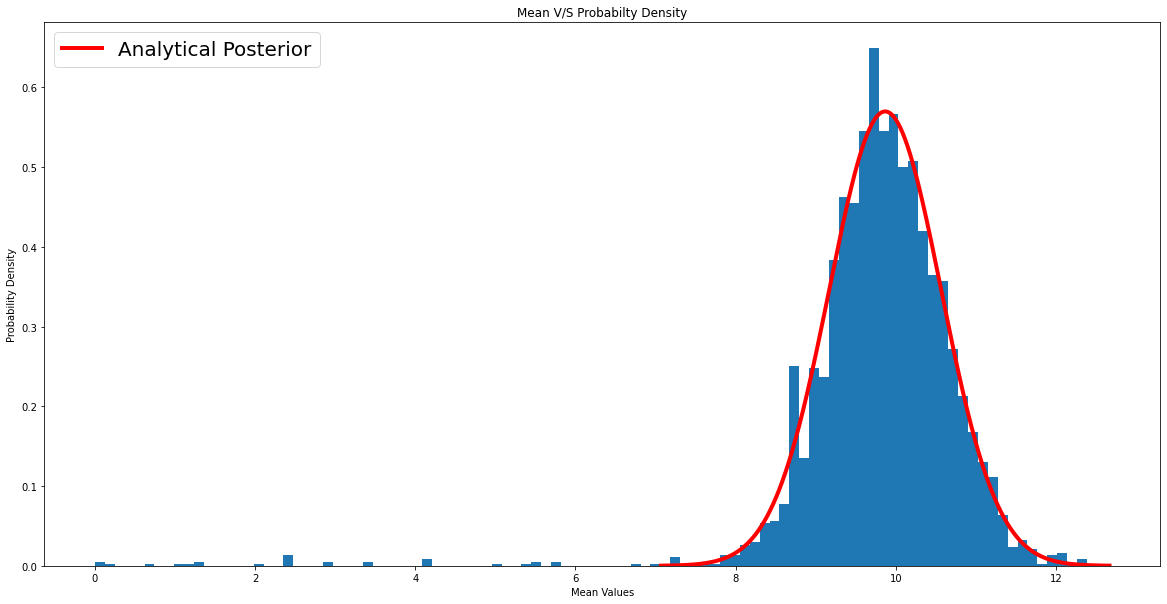

In [25]:

fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(convergetime.keys())[-1],10) ##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) 
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4)
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

### Taking Sub-Optimal Proposal Width based on Mean Difference

Text(0.5, 1.0, 'Mean V/S Probabilty Density')

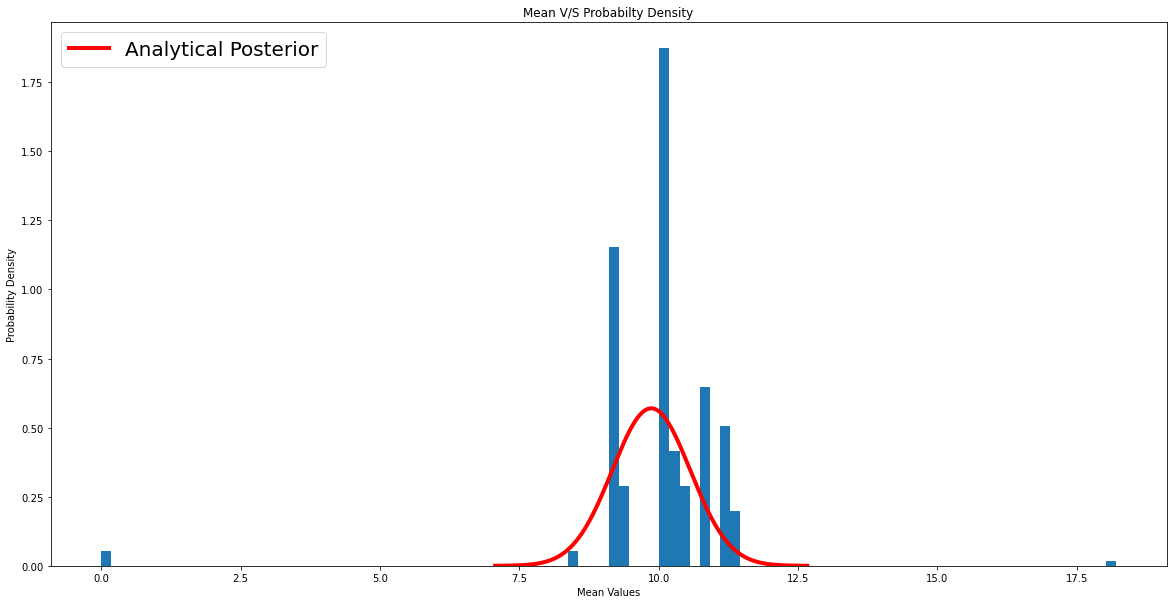

In [26]:
fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(mean_diff.keys())[-1],10)##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) ##Plots Histogram of Proposed Posterior and its density
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4) ##Plots Analytical Posterior
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()

### Taking Sub-Optimal Proposal Width based on Standard Deviation Difference

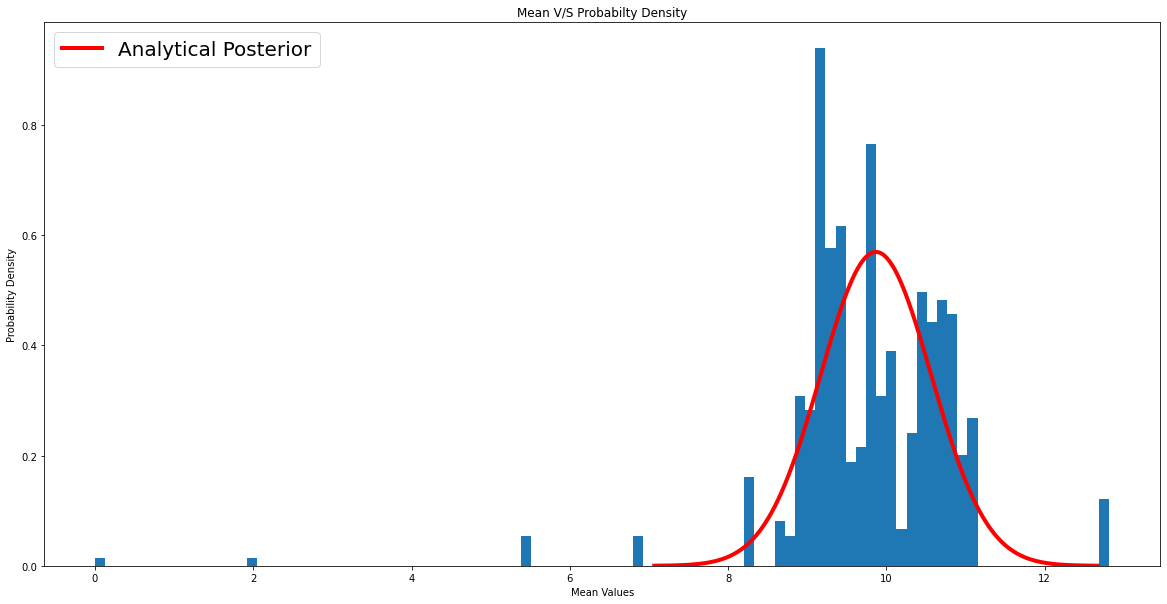

In [27]:
fig , ax = plt.subplots(1)
proposal_posterior = mcmc(0,list(std_diff.keys())[-1],10)##Takes the Proposal Width which is in last position in dictionary to get worst proposal width

ax.hist(proposal_posterior,bins=100,density = True) ##Plots Histogram of Proposed Posterior and its density
ax.plot(mu_space3,posterior, color = 'r' , label = 'Analytical Posterior',linewidth = 4) ##Plots Analytical Posterior
ax.legend(loc = 'upper left' ,prop = {'size' : 20})

ax.set_xlabel('Mean Values')
ax.set_ylabel('Probability Density')
ax.set_title('Mean V/S Probabilty Density')
print()